Brain Tumor **Detection** using MRI Images
We will run the following code to detect tumor from MRI Images

In [44]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [45]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [46]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []
for r, d, f in os.walk(r'../content/sample_data/yes'):

    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())


In [58]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"../content/sample_data/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

AttributeError: ignored

In [48]:
data = np.array(data)
data.shape

(32, 128, 128, 3)

In [49]:
result = np.array(result)
#so I took only 15 images for yes and no each. you will change the value 32(array size 64) 
#according to number of input images array sie was 64 so we divide in into 2 arrays with 2 elements each
result = result.reshape(32,2) 


In [50]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [51]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      416       
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_4 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 64)       

In [52]:
y_train.shape

(25, 2)

In [53]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
1/1 [==============================] - 3s 3s/step - loss: 2.2303 - val_loss: 80.5555
Epoch 2/30
1/1 [==============================] - 2s 2s/step - loss: 11.1439 - val_loss: 112.5575
Epoch 3/30
1/1 [==============================] - 2s 2s/step - loss: 25.6992 - val_loss: 138.1038
Epoch 4/30
1/1 [==============================] - 2s 2s/step - loss: 46.0542 - val_loss: 98.5815
Epoch 5/30
1/1 [==============================] - 2s 2s/step - loss: 43.5705 - val_loss: 67.9372
Epoch 6/30
1/1 [==============================] - 2s 2s/step - loss: 21.7243 - val_loss: 86.0391
Epoch 7/30
1/1 [==============================] - 2s 2s/step - loss: 28.6640 - val_loss: 70.8458
Epoch 8/30
1/1 [==============================] - 2s 2s/step - loss: 28.2660 - val_loss: 63.3341
Epoch 9/30
1/1 [==============================] - 2s 2s/step - loss: 13.7808 - val_loss: 63.4024
Epoch 10/30
1/1 [==============================] - 2s 2s/step - loss: 11.8867 - val_loss: 62.3557
Epoch 11/30
1/1 [===========

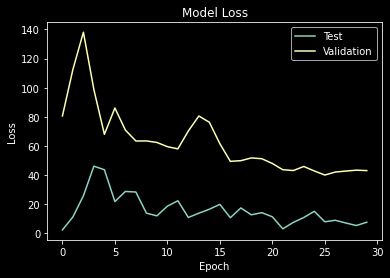

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [55]:
def names(number):
    if number==0:
        return 'a Tumor'
    else:
        return 'not a tumor'

100.0% Confidence This Is not a tumor


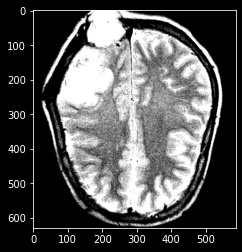

In [56]:
from matplotlib.pyplot import imshow
img = Image.open(r'../content/sample_data/yes/y1.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

74.83195066452026% Confidence This Is A not a tumor


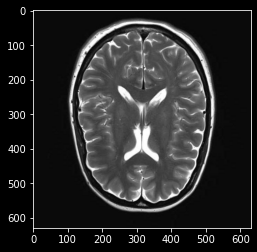

In [57]:
from matplotlib.pyplot import imshow
img = Image.open(r"../content/sample_data/no/No12.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

## Next steps 🏃

This is just a short introduction to JupyterLab and Jupyter Notebooks. See below for some more ways to interact with tools in the Jupyter ecosystem, and its community.

### Other notebooks in this demo

Here are some other notebooks in this demo. Each of the items below corresponds to a file or folder in the **file browser to the left**.

- [**`Lorenz.ipynb`**](Lorenz.ipynb) uses Python to demonstrate interactive visualizations and computations around the [Lorenz system](https://en.wikipedia.org/wiki/Lorenz_system). It shows off basic Python functionality, including more visualizations, data structures, and scientific computing libraries.
- [**`sqlite.ipynb`**](sqlite.ipynb) demonstrates how an in-browser sqlite kernel to run your own SQL commands from the notebook. It uses the [jupyterlite/xeus-sqlite-kernel](https://github.com/jupyterlite/xeus-sqlite-kernel).

### Other sources of information in Jupyter

- **More on using JupyterLab**: See [the JupyterLab documentation](https://jupyterlab.readthedocs.io/en/stable/) for more thorough information about how to install and use JupyterLab.
- **More interactive demos**: See [try.jupyter.org](https://try.jupyter.org) for more interactive demos with the Jupyter ecosystem.
- **Learn more about Jupyter**: See [the Jupyter community documentation](https://docs.jupyter.org) to learn more about the project, its community and tools, and how to get involved.
- **Join our discussions**: The [Jupyter Community Forum](https://discourse.jupyter.org) is a place where many in the Jupyter community ask questions, help one another, and discuss issues around interactive computing and our ecosystem.